In [438]:
import pandas as pd
from matplotlib import pyplot
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics

In [261]:
pwd()

'/Users/julia/Desktop'

In [569]:
project = pd.read_csv('projectnumber.csv', sep=';')

In [570]:
project

,Project Number,Legacy Project Number
0,30000000,Unspecified
1,30001202,Unspecified
2,30001203,Unspecified
3,30001204,Unspecified
4,30001205,Unspecified
...,...,...
65529,30082912,Unspecified
65530,30082914,Unspecified
65531,30082919,Unspecified
65532,30082920,Unspecified


In [3]:
df = pd.read_csv('portfolio.csv') #low_memory=False

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (2,3,4,5,6,8,12,13,14,16,18,19,20,23,24,26,27,32,33,34,35,38,40,41,42,43,44,45,46,47,48,49,51,52,53,54,55,56,59,60,61,62,79,80,95,96,97,98,100,112,113,114,115,116,117,122,126,127,128,129,130,131,132,138,143,144,145,159,163,164,166,169,172,175,176,201,202) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [143]:
df1 = df[["Fiscal Period Code",
"Project Number",
"Project Id",
"Project Name",
"Health and Safety Status",
"project_date_create",
"Project Status",
"SalesCloudClientNo",
"Related Opportunity Project Number",
"Contract Type Name",
"Ultimate Customer AUS Market Sector",
"Division Short Name",
"location_2", 
"location_4",
"primary_client_industry",
"Sales Cloud Opportunity Number",
"Funding Amount - ITC (Snapshot)",
"Backlog NR",
"Actual Direct Labor Cost - MTD",
"Actual Direct Labor Cost - YTD",
"Actual Gross Revenue - ITD",
"Actual Gross Revenue - MTD",
"Actual Gross Revenue - YTD",
"Actual Net Revenue - ITD",
"Actual Net Revenue - MTD",
"Actual Net Revenue - YTD",
"EBITA - MTD",
"EBITA - YTD",
"EBITA - ITD",
"Forecast Direct Labor Cost - ITC",
"Forecast Net Revenue - ITC",
"Order Intake (NR) - MTD",
"Order Intake (NR) - QTD",
"Order Intake (NR) - YTD",
"WBS1",
"bookings_jtd",
"interest_current",
"interest_jtd",
"interest_ytd",
"multiplier_budget",
"multiplier_current",
"multiplier_target",
"overhead_current", 
"overhead_rate",
"revenue_type"]].copy()

In [623]:
#df1.to_csv('subportfolio.csv')
df1 = pd.read_csv('subportfolio.csv')

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (2,3,5,9,11,13,14,15,16,35,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [624]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [625]:
#project['Project Number'].fillna(0, inplace = True)

In [626]:
df1['Project Number'] = df1['Project Number'].astype('str') 
df1['Project Number'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [627]:
df1[df1['Project Number'] == 'CI0016060017'] #30082036 #CI001606.0017

,Fiscal Period Code,Project Number,Project Id,Project Name,Health and Safety Status,project_date_create,Project Status,SalesCloudClientNo,Related Opportunity Project Number,Contract Type Name,...,bookings_jtd,interest_current,interest_jtd,interest_ytd,multiplier_budget,multiplier_current,multiplier_target,overhead_current,overhead_rate,revenue_type
1393984,201903,CI0016060017,E7556A2B4A8140A1BEDC250531C17086,TRRA 2019 Groundwater Monitoring,NaN,NaN,A,10239342.0,NaN,Lump Sum,...,7000.0,0.00,0.00,0.00,2.92,2.92,2.8,53.72,142.95,G
1420168,201904,CI0016060017,E7556A2B4A8140A1BEDC250531C17086,TRRA 2019 Groundwater Monitoring,NaN,NaN,A,10239342.0,NaN,Lump Sum,...,7000.0,-1.81,-1.81,-1.81,2.92,2.92,2.8,402.09,142.95,G
1471939,201905,CI0016060017,E7556A2B4A8140A1BEDC250531C17086,TRRA 2019 Groundwater Monitoring,NaN,NaN,A,10239342.0,NaN,Lump Sum,...,7000.0,-0.92,-2.73,-2.73,2.92,2.92,2.8,123.04,142.95,G
1507409,201906,CI0016060017,E7556A2B4A8140A1BEDC250531C17086,TRRA 2019 Groundwater Monitoring,NaN,NaN,A,10239342.0,NaN,Lump Sum,...,7000.0,4.09,1.36,1.36,2.92,2.92,2.8,1122.16,142.95,G


In [628]:
len(df1) #len(project), len(result)

2179046

In [578]:
legacy = project[project['Legacy Project Number'] != 'Unspecified'] #reduces the list of projects by about 63.000 enrties

In [587]:
len(legacy)

5233

In [579]:
len(legacy['Project Number'].unique())

5233

In [580]:
project['Project Number'] = project['Project Number'].astype('str') 
project['Project Number'].apply(type).unique()

array([<class 'str'>], dtype=object)

## Preparing the project numbers list where we remove the unspecified

In [588]:
leg = legacy[['Project Number', 'Legacy Project Number']].copy()

In [582]:
#leg.drop_duplicates('Project Number', inplace=True)

In [597]:
leg['Legacy Project Number'].unique()

5233

In [598]:
leg['Legacy Project Number'] = leg['Legacy Project Number'].str.replace('[^\w\s]','')

## Select only the unique legacy numbers, then merge back with the project numbers, merge on project number

In [612]:
freq=leg.groupby('Legacy Project Number')
count =freq['Legacy Project Number'].count()

In [613]:
df_count=pd.DataFrame({'Legacy Project Number':count.index, 'count':count.values})

In [614]:
df_count.sort_values('count', 
                      inplace=True, 
                      ascending=False)

In [615]:
df_notunique = df_count[df_count['count'] == 1]

In [616]:
len(df_notunique)

4892

In [619]:
leg2 = pd.merge(leg, df_notunique, on="Legacy Project Number", how='inner')

In [633]:
leg2.head()

,Project Number,Legacy Project Number,count
0,30001211,000052580000,1
1,30001213,000110540002,1
2,30001214,000110560000,1
3,30001219,000408190009,1
4,30001222,0004105381MP,1


In [622]:
legacydict = dict(zip(leg2['Legacy Project Number'], leg2['Project Number']))
#legacydict = {lpn[i] : pn[i] for i in range(len(lpn))}
#pn = leg['Project Number'].to_list()

In [629]:
df1['Project Number']=df1['Project Number'].map(legacydict).fillna(df1['Project Number'])

In [635]:
freq=df1.groupby('Project Number')
count =freq['Project Number'].count()
df_count=pd.DataFrame({'Legacy Project Number':count.index, 'count':count.values})
df_count.sort_values('count', 
                      inplace=True, 
                      ascending=False)
df_count

,Legacy Project Number,count
81382,nan,1306653
6902,30004018,27
7248,30004364,27
7224,30004340,27
7221,30004337,27
...,...,...
41599,30082322,1
41598,30082321,1
41597,30082320,1
41596,30082319,1


## clean up the values for contract status and project status

In [646]:
df1.columns

Index(['Fiscal Period Code', 'Project Number', 'Project Id', 'Project Name',
       'Health and Safety Status', 'project_date_create', 'Project Status',
       'SalesCloudClientNo', 'Related Opportunity Project Number',
       'Contract Type Name', 'Ultimate Customer AUS Market Sector',
       'Division Short Name', 'location_2', 'location_4',
       'primary_client_industry', 'Sales Cloud Opportunity Number',
       'Funding Amount - ITC (Snapshot)', 'Backlog NR',
       'Actual Direct Labor Cost - MTD', 'Actual Direct Labor Cost - YTD',
       'Actual Gross Revenue - ITD', 'Actual Gross Revenue - MTD',
       'Actual Gross Revenue - YTD', 'Actual Net Revenue - ITD',
       'Actual Net Revenue - MTD', 'Actual Net Revenue - YTD', 'EBITA - MTD',
       'EBITA - YTD', 'EBITA - ITD', 'Forecast Direct Labor Cost - ITC',
       'Forecast Net Revenue - ITC', 'Order Intake (NR) - MTD',
       'Order Intake (NR) - QTD', 'Order Intake (NR) - YTD', 'WBS1',
       'bookings_jtd', 'interest_curren

In [662]:
df1['Project Status'].unique()

array(['Open/Active', 'Dormant', 'On Hold - Inactive', 'Closed',
       'Closed-Open to Collect', 'Final Closure Requested', 'New',
       'New - Pending Open/Activepproval', 'Rejected', nan,
       'Manual_Adjust', 'Not Applicable'], dtype=object)

In [647]:
df1['Project Status']= df1['Project Status'].str.replace(r'^(A)$','Open/Active')
df1['Project Status']= df1['Project Status'].str.replace(r'^(D)$','Dormant')
df1['Project Status']= df1['Project Status'].str.replace(r'^(I)$','On Hold - Inactive')
## New - pending, rejected, manual adjust are ignored for forecasting

In [682]:
df1['Contract Type Name'].unique()

array(['Time and Material', 'Lump Sum', 'Cost plus Fixed Fee', 'D', 'N',
       'Revenue group', 'H', nan, 'Time and Material with cap',
       'Lump Sum with IFRS', 'Unspecified', '0', 'Not Applicable'],
      dtype=object)

In [673]:
df1['Contract Type Name']= df1['Contract Type Name'].str.replace(r'^(T)$', 'Time and Material')
df1['Contract Type Name']= df1['Contract Type Name'].str.replace(r'^(L)$', 'Lump Sum')
df1['Contract Type Name']= df1['Contract Type Name'].str.replace(r'^(C)$', 'Cost plus Fixed Fee')
df1['Contract Type Name']= df1['Contract Type Name'].str.replace(r'^(M)$', 'Lump Sum')



In [683]:
df1.to_csv('mapped_projects.csv')

### Run basic analysis to understand the distribution per project type

In [684]:
def analysis(column):
    print(df1[column].unique())
    sub = df1.groupby(column).count()
    # plot the dataframe 
    return sub.plot(y=["Project Number"], kind="bar", figsize=(9, 8))

['Time and Material' 'Lump Sum' 'Cost plus Fixed Fee' 'D' 'N'
 'Revenue group' 'H' nan 'Time and Material with cap' 'Lump Sum with IFRS'
 'Unspecified' '0' 'Not Applicable']


<AxesSubplot:xlabel='Contract Type Name'>

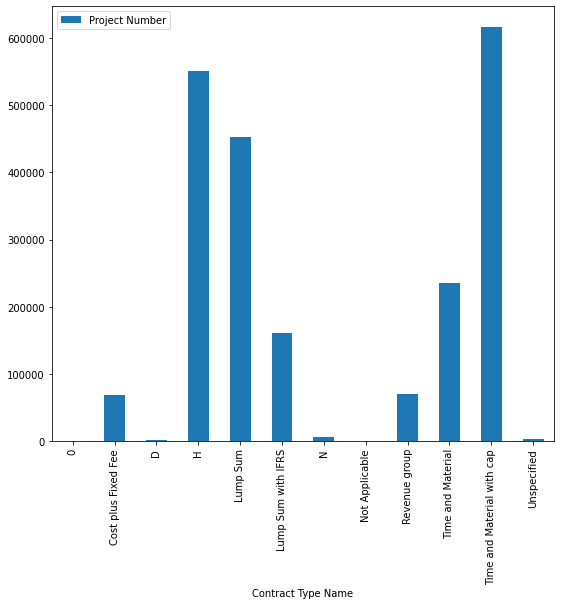

In [685]:
analysis('Contract Type Name')

[nan 'Consumer Goods & Retail' 'Oil & Gas' 'Fin. Institutions/Investors'
 'Commercial Developers' 'Municipalities/Local Govt.'
 'Water Companies/Utilities' 'Rail' 'Automotive' 'Chemicals'
 'Conglomerates' 'Power Companies/Utilities' 'State/Regional Government'
 'Life Sciences' 'Aerospace' 'Technology' 'Ports/Transportation'
 'Central/Federal Government' 'Mining & Metals' 'Education' 'Intercompany'
 'Other Private' 'Institutional Agencies' 'Healthcare' 'Non-Rail'
 'Unspecified']


<AxesSubplot:xlabel='Ultimate Customer AUS Market Sector'>

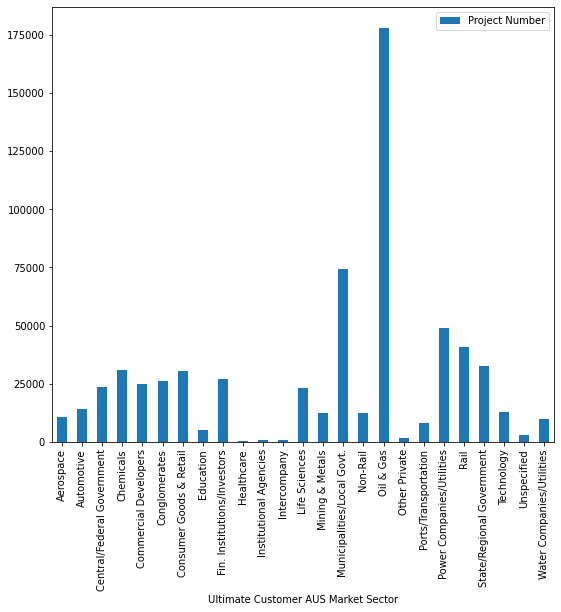

In [686]:
analysis('Ultimate Customer AUS Market Sector')

['Environment' 'Water' 'Enabling Function' 'Buildings' 'Infrastructure']


<AxesSubplot:xlabel='Division Short Name'>

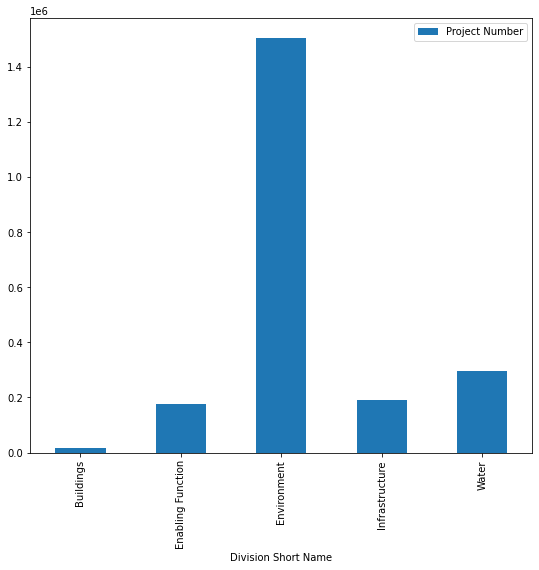

In [687]:
analysis('Division Short Name')

In [689]:
f" There are {len(df1['SalesCloudClientNo'].unique())} unique clients"

' There are 3280 unique clients'

In [690]:
f" There are {len(df1['Project Number'].unique())} unique projects"

' There are 81383 unique projects'

In [692]:
f" There are {len(df_count[df_count['count'] == 27])} projects where we have 27 datapoints" 

' There are 2830 projects where we have 27 datapoints'

## Figure out which Project Number is most frquent, start subsetting dfs from there, i.e. how much data is available - also how is forecasting done for projects in the beginning of the period

In [693]:
df1['Fiscal Period Code'] = pd.to_datetime(df1['Fiscal Period Code'], format='%Y%m') 

In [694]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179046 entries, 0 to 2179045
Data columns (total 45 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   Fiscal Period Code                   datetime64[ns]
 1   Project Number                       object        
 2   Project Id                           object        
 3   Project Name                         object        
 4   Health and Safety Status             object        
 5   project_date_create                  float64       
 6   Project Status                       object        
 7   SalesCloudClientNo                   float64       
 8   Related Opportunity Project Number   object        
 9   Contract Type Name                   object        
 10  Ultimate Customer AUS Market Sector  object        
 11  Division Short Name                  object        
 12  location_2                           object        
 13  location_4                 

In [637]:
df_27 =df_count[df_count['count'] == 27] #2830 entries with 27 records

,Legacy Project Number,count
6902,30004018,27
7248,30004364,27
7224,30004340,27
7221,30004337,27
7217,30004333,27
...,...,...
16044,30013180,27
16041,30013177,27
16039,30013175,27
22402,30019579,27


In [ ]:
# create a function to create dfs

def generate_dataframes(number):
    df_number = df_count[df_count['count'] == number] 
    for x in df_number['Legacy Project Number']:
        df.
        

#create two labels, 0 corresponding to negative, 1 to positive.
df['label'] = 0
for x in df.index:
    if df.loc[x, 'overall'] > 3:
        df.loc[x, 'label'] =  1    
        
        
[["Fiscal Period Code", "Funding Amount - ITC (Snapshot)", "Backlog NR", 'Actual Gross Revenue - ITD', 'Actual Gross Revenue - MTD',
       'Actual Gross Revenue - YTD', 'Actual Net Revenue - ITD','Actual Net Revenue - MTD', 'Actual Net Revenue - YTD']].copy()        

In [ ]:
#2019 data half cut off
df_AIR000730000 = AIR000730000[["Fiscal Period Code", "Funding Amount - ITC (Snapshot)", "Backlog NR", 'Actual Gross Revenue - ITD', 'Actual Gross Revenue - MTD',
       'Actual Gross Revenue - YTD', 'Actual Net Revenue - ITD','Actual Net Revenue - MTD', 'Actual Net Revenue - YTD']].copy()


df_AIR000730000.set_index('Fiscal Period Code')

In [644]:
### Here I was exploring some cases
'''
BP 10238206.0 , mdKCAUGHHORN220630032457
CSX 10239458.0 , ADVCLIENT3021
df1[df1['Project Id'] == 'mdKCAUGHHORN220630032443']
df1[df1['Project Number'].astype(str).str.contains("GP16BPNA")]

'''

'''
#Novartis Client
ADVCLIENT6983 = df1[df1['Project Id'] == 'ADVCLIENT6983']
AIR000730000 = df1[df1['Project Number'] == 'AIR000730000']
b = df1[df1['Project Number'] == 30005629] 
AIR000730000 = pd.concat([AIR000730000, b])
AIR000730000[AIR000730000.columns[0:20]].tail(10)
'''

'''
#this client has lots of projects going on
UNIVAR =df1[df1['SalesCloudClientNo'] == 10239939.0] 
#UNIVAR['Project Number'].unique()
a=UNIVAR[UNIVAR['Project Number'] == '30018304'] 
b=UNIVAR[UNIVAR['Project Number'].astype(str).str.contains("TX001037")]
b

'''

'''
df_TX001037 = pd.concat([b,a])
df_TX001037 = df_TX001037[["Fiscal Period Code", "Funding Amount - ITC (Snapshot)", "Backlog NR", 'Actual Gross Revenue - ITD', 'Actual Gross Revenue - MTD',
       'Actual Gross Revenue - YTD', 'Actual Net Revenue - ITD','Actual Net Revenue - MTD', 'Actual Net Revenue - YTD']].copy()
       
#Problem with the dates here, conatins 2018 and 2019 entires, uneven recording periods
df_TX001037       
'''